# Popularity-based Recommendation System

### Train

In [46]:
# Import required library
import pandas as pd
import numpy as np

In [47]:
# Read user-song-plays triplets
user_song_plays_triplets = pd.read_csv('kag.txt', sep="\t", header=None, index_col=False)
user_song_plays_triplets.columns = ['user_id', 'song_id', 'number_of_plays']
user_song_plays_triplets

,user_id,song_id,number_of_plays
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
...,...,...,...
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2


In [48]:
# Extract song-ids and number of plays of songs to determine their popularity
song_plays_pairs = user_song_plays_triplets.groupby(['song_id'], as_index=False).sum()
song_plays_pairs = song_plays_pairs.sort_values(['number_of_plays'], ascending=False)
song_plays_pairs

,song_id,number_of_plays
10546,SOBONKR12A58A7A7E0,35432
5478,SOAUWYT12A81C206F1,33179
121599,SOSXLTC12AF72A7F54,24359
38185,SOFRQTD12A81C233C0,19454
28684,SOEGIYH12A6D4FC0E3,17115
...,...,...
67492,SOKEJSK12AC468A801,1
129479,SOUGBCY12AB01850C9,1
67491,SOKEJSK12A6D4FC1EB,1
129483,SOUGBJU12A6D4F83A4,1


In [49]:
# Recommend top-10 popular songs
print('Recommended (top 100 popular) songs:')
trending_recms = song_plays_pairs.iloc[0:100,:].values
trending_recms

Recommended (top 100 popular) songs:


array([['SOBONKR12A58A7A7E0', 35432],
       ['SOAUWYT12A81C206F1', 33179],
       ['SOSXLTC12AF72A7F54', 24359],
       ['SOFRQTD12A81C233C0', 19454],
       ['SOEGIYH12A6D4FC0E3', 17115],
       ['SOAXGDH12A8C13F8A1', 14279],
       ['SONYKOW12AB01849C9', 12392],
       ['SOVDSJC12A58A7A271', 11610],
       ['SOUFTBI12AB0183F65', 10794],
       ['SOHTKMO12AB01843B0', 10515],
       ['SOPUCYA12A8C13A694', 9921],
       ['SOOFYTN12A6D4F9B35', 9685],
       ['SOBOUPA12A6D4F81F1', 8972],
       ['SODJWHY12A8C142CCE', 8718],
       ['SOLFXKT12AB017E3E0', 8093],
       ['SOTCMDJ12A6D4F8528', 7969],
       ['SOFLJQZ12A6D4FADA6', 7895],
       ['SOTWNDJ12A8C143984', 7331],
       ['SOUVTSM12AC468F6A7', 7210],
       ['SOUNZHU12A8AE47481', 7052],
       ['SOUSMXX12AB0185C24', 6778],
       ['SOUDLVN12AAFF43658', 6651],
       ['SOWEHOM12A6BD4E09E', 5781],
       ['SOLGLUC12AB018A8FA', 5695],
       ['SOPSOHT12A67AE0235', 5562],
       ['SOWCKVR12A8C142411', 5463],
       ['SOBFRNE12A6D4F7995'

### Chart

In [50]:
# Read song details
song_info = pd.read_csv('unique_tracks.txt', sep='<SEP>', header=None, engine='python')
song_info.columns = ['track_id', 'song_id', 'artist_name', 'song_title']
song_info.head()

,track_id,song_id,artist_name,song_title
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [51]:
# Map song id to its name
song_id_to_title = {}
for index, row in song_info.iterrows():
  song_id_to_title[row['song_id']] = row['song_title']
song_id_to_title

{'SOQMMHC12AB0180CB8': 'Silent Night',
 'SOVFVAK12A8C1350D9': 'Tanssi vaan',
 'SOGTUKN12AB017F4F1': 'No One Could Ever',
 'SOBNYVR12A8C13558C': 'Si Vos Querés',
 'SOHSBXH12A8C13B0DF': 'Tangle Of Aspens',
 'SOZVAPQ12A8C13B63C': 'Symphony No. 1 G minor "Sinfonie Serieuse"/Allegro con energia',
 'SOQVRHI12A6D4FB2D7': 'We Have Got Love',
 'SOEYRFT12AB018936C': "2 Da Beat Ch'yall",
 'SOPMIYT12A6D4F851E': 'Goodbye',
 'SOJCFMH12A8C13B0C2': "Mama_ mama can't you see ?",
 'SOYGNWH12AB018191E': "L'antarctique",
 'SOLJTLX12AB01890ED': 'El hijo del pueblo',
 'SOQQESG12A58A7AA28': 'Cold Beer feat. Prince Metropolitan',
 'SOMPVQB12A8C1379BB': 'Pilots',
 'SOGPCJI12A8C13CCA0': 'N Gana',
 'SOSDCFG12AB0184647': '006',
 'SOBARPM12A8C133DFF': '(Looking For) The Heart Of Saturday',
 'SOKOVRQ12A8C142811': 'Ethos of Coercion',
 'SOIMMJJ12AF72AD643': 'Rock-N-Rule',
 'SOVMBTP12A8C13A8F6': 'La bola extra',
 'SOOUESZ12AB0189AFD': 'I Made It Over',
 'SOAGMGG12A6D4F9099': 'Debussy : 12 Etudes : VI Pour les huit do

In [52]:
# Prepare a chart of top-10 trending songs
chart = song_plays_pairs.iloc[0:10,:].values
for i in range(0,10):
    chart[i][0] = song_id_to_title[chart[i][0]]
chart = pd.DataFrame(chart)
chart.columns = ['song_name', 'number_of_plays']
print('Top-10 Trending Songs (Popularity-based):')
chart

Top-10 Trending Songs (Popularity-based):


,song_name,number_of_plays
0,You're The One,35432
1,Undo,33179
2,Revelry,24359
3,Sehr kosmisch,19454
4,Horn Concerto No. 4 in E flat K495: II. Romanc...,17115
5,Dog Days Are Over (Radio Edit),14279
6,Secrets,12392
7,Ain't Misbehavin,11610
8,Invalid,10794
9,Catch You Baby (Steve Pitron & Max Sanna Radio...,10515


### Prepare test data

In [ ]:
def sort_dict_dec(d):
    sorted_keys = sorted(d.keys(), key=lambda s: len(d[s]), reverse=True)
    sorted_dict = {}
    for i in range(0,len(d)):
        sorted_dict[sorted_keys[i]] = d[sorted_keys[i]]
    return sorted_dict

In [ ]:
def user_to_songs(if_str):
    uts = dict()
    with open(if_str, "r") as f:
        for line in f:
            user, song, _ = line.strip().split('\t')
            if user in uts:
                uts[user].add(song)
            else:
                uts[user] = set([song])
    return sort_dict_dec(uts)

In [ ]:
u2s_testing = user_to_songs('hid.txt')
u2s_testing

In [ ]:
testing_500_users_sorted = np.array(list(u2s_testing.keys())[0:500])
np.savetxt('testing_500_users_sorted.txt', testing_500_users_sorted, fmt='%s')

In [ ]:
# Prepare a list of top 500 users who have listened to the most number of songs
testing_users = list(pd.read_csv('testing_500_users_sorted.txt', header=None).iloc[:,0])
testing_users

In [ ]:
final_recm_popularity_based = {}
for i in range(0,500):
    final_recm_popularity_based[testing_users[i]] = trending_recms[:,0]
final_recm_popularity_based

### MAP

In [ ]:
def AP_mod(l_rec, user_given_songs, tau):

    np = len(user_given_songs)
    #print "np:", np
    nc = 0.0
    ap = 0.0
    for j, s in enumerate(l_rec):
        if s in user_given_songs:
            # print "s in sMu"
            nc += 1.0
            ap += nc/(j+1)
    ap /= min(np, tau)
    return ap

# l_users: list of users
# l_rec_songs: list of lists, recommended songs for users
# u2s: mapping users to songs
# tau: 30

In [ ]:
def mAP_mod(first_500, l_rec_songs, u2s_testing, tau):
    mapr = 0
    n_users = len(first_500)
    for user in first_500:
        if not user in u2s_testing:
            continue
        mapr += AP_mod(l_rec_songs[user], u2s_testing[user], tau)
    return mapr/n_users

### Evaluation

In [19]:
result = mAP_mod(testing_500_users_sorted, final_recm_popularity_based, u2s_testing, 30)
print(result)

0.019363156957066023


### Temp

In [44]:
res = {
    'Item-based': 4.1726901853522964,
    'User-based': 7.644111699192406,
    'kNN': 1.3611648231225478,
    'Popularity-based': 1.9363156957066023,
    'Factorization': 4.18612864868662,
    'Factorization_reg': 4.72852876274}

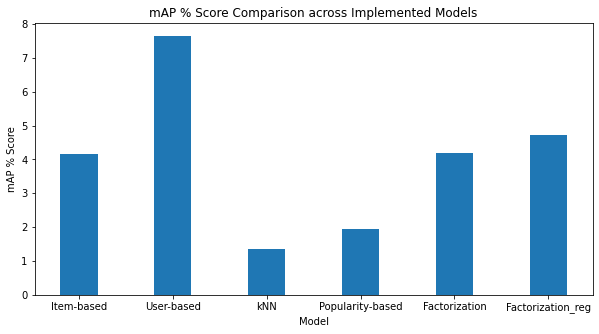

In [45]:
import numpy as np                                                               
import matplotlib.pyplot as plt

courses = list(res.keys())
values = list(res.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values,
        width = 0.4)
 
plt.xlabel("Model")
plt.ylabel("mAP % Score")
plt.title("mAP % Score Comparison across Implemented Models")
plt.show()